WARNING *** file size (27502) not 512 + multiple of sector size (512)
WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero
            Rate, %
Month              
1953-04-01     2.83
1953-05-01     3.05
1953-06-01     3.11
1953-07-01     2.93
1953-08-01     2.95
1953-09-01     2.87
1953-10-01     2.66
1953-11-01     2.68
1953-12-01     2.59
1954-01-01     2.48
(647, 1)
Rate, %    float64
dtype: object


<Axes: title={'center': 'DF Over Time'}, xlabel='Month'>

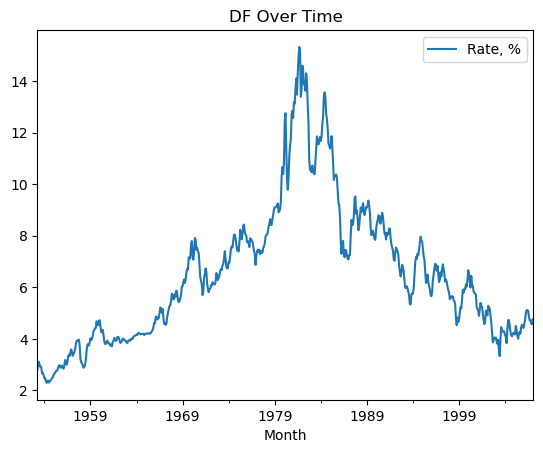

In [8]:
import pandas as pd
from pmdarima import auto_arima as auto_arima
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose as sd
from statsmodels.tsa import holtwinters as hw


# datetime should always be index 0, values index 1
# date_gran = 'Month' # date granularity 
df = pd.read_excel('~\Downloads\Securities.xls')
df.iloc[:,0] = pd.to_datetime(df.iloc[:,0])
df.set_index(df.iloc[:,0].name, inplace=True)
print(df.head(10))
print(df.shape) # index changes from 0:1 to 0:0 due to set_index()
print(df.dtypes)

df.plot(title='DF Over Time')

### Analysis on decomposing
the time series down to individual components

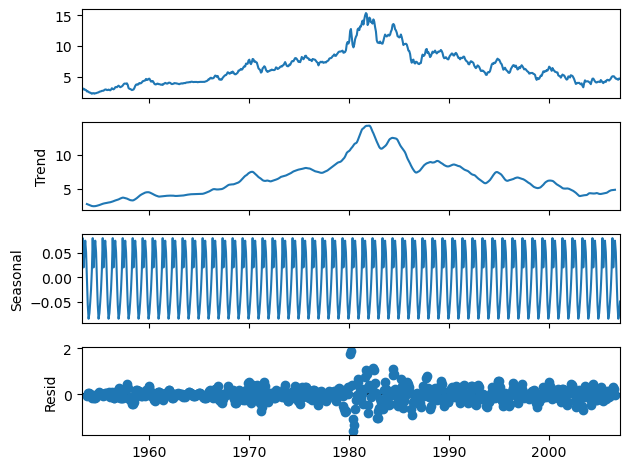

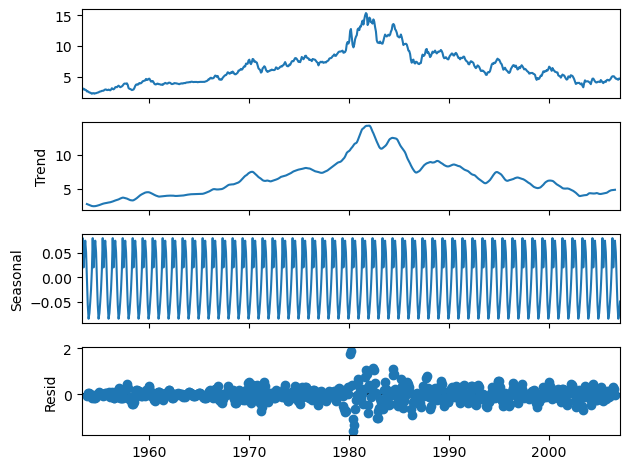

In [9]:
# showcasing the decomposition of plot
decomp = sd(df, model='additive')
decomp.plot()

#### What does the decomp plot say?
... fill in here
All should check againt additive and multiplicative


In [10]:
# set frequency, if by day, week, month, year
df.index.freq = 'MS' # monthly granularity
m = 12
alpha = 1/(2*m)

### Now fitting HW exponential smoothing


                       SimpleExpSmoothing Model Results                       
Dep. Variable:                Rate, %   No. Observations:                  647
Model:             SimpleExpSmoothing   SSE                            732.674
Optimized:                      False   AIC                             84.457
Trend:                           None   BIC                             93.402
Seasonal:                        None   AICC                            84.520
Seasonal Periods:                None   Date:                 Sun, 24 Mar 2024
Box-Cox:                        False   Time:                         18:21:34
Box-Cox Coeff.:                  None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.0416667                alpha                False
initial_level              2.8300000                

<Axes: xlabel='Month'>

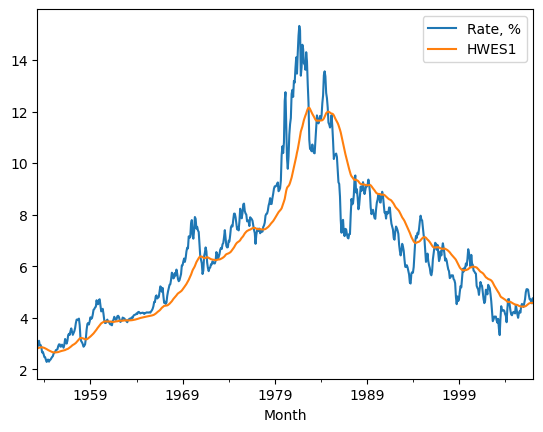

In [11]:
# Simple exponential smoothing
model =  hw.SimpleExpSmoothing(df.iloc[:,0]).fit(smoothing_level=alpha, optimized=False, use_brute=True)
print(model.summary())

df['HWES1'] = model.fittedvalues
df.plot()

In [ ]:
# Getting into auto arima
model = auto_arima(
    df.iloc[:, 1], 
    m=12,               # frequency of series                      
    seasonal=True,  # TRUE if seasonal series
    d=None,             # let model determine 'd'
    test='adf',         # use adftest to find optimal 'd'
    start_p=0, start_q=0, # minimum p and q
    max_p=12, max_q=12, # maximum p and q
    D=None,             # let model determine 'D'
    trace=True,
    error_action='ignore',  
    suppress_warnings=True, 
    stepwise=True
)


            Rate, %     HWES1    SARIMA
Month                                  
1953-04-01     2.83  2.830000  0.000000
1953-05-01     3.05  2.830000  2.830000
1953-06-01     3.11  2.839167  2.830000
1953-07-01     2.93  2.850451  2.850853
1953-08-01     2.95  2.853766  2.860264
...             ...       ...       ...
2006-10-01     4.73  4.573501  4.576746
2006-11-01     4.60  4.580021  4.578268
2006-12-01     4.56  4.580854  4.587058
2007-01-01     4.76  4.579985  4.579018
2007-02-01     4.72  4.587486  4.580310

[647 rows x 3 columns]


<Axes: xlabel='Month'>

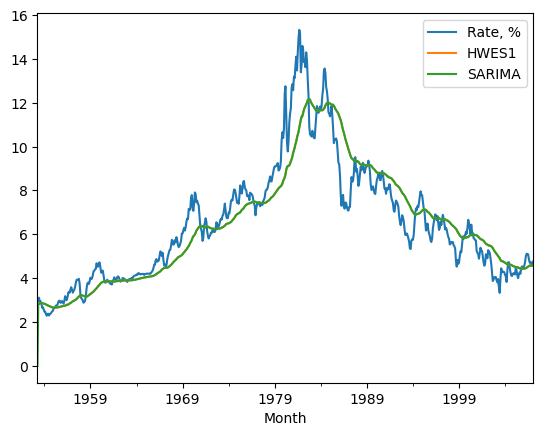

In [27]:
print(model.summary())

df['SARIMA'] = model.fittedvalues()
print(df)
df.plot()


In [29]:
print(model.conf_int())

fc, confit = model.predict(n_periods=12, return_conf_int=True)
print(fc, confit)



                 0         1
ar.L1     0.934149  0.964641
ma.L1     0.376651  0.474910
ma.L2    -0.149882 -0.044965
ar.S.L12 -0.121278 -0.008326
sigma2    0.000105  0.000119
2007-03-01    4.597163
2007-04-01    4.605243
2007-05-01    4.612179
2007-06-01    4.618427
2007-07-01    4.624344
2007-08-01    4.630001
2007-09-01    4.635924
2007-10-01    4.641973
2007-11-01    4.647684
2007-12-01    4.653454
2008-01-01    4.659039
2008-02-01    4.663802
Freq: MS, dtype: float64 [[4.57644137 4.61788462]
 [4.55184175 4.65864515]
 [4.52071805 4.70364063]
 [4.48436319 4.75249151]
 [4.44402711 4.80466077]
 [4.40047753 4.85952352]
 [4.35478762 4.91706112]
 [4.3072522  4.97669294]
 [4.25776824 5.03759977]
 [4.20702834 5.09987897]
 [4.15504031 5.16303739]
 [4.10137931 5.22622447]]
